In [183]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle
import warnings

Tracking section

In [184]:
rows = []
file_name = 'RISLlab_Lidar_of_walking'
with open(file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T

test


In [197]:
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info


,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000124
scan_time,0.133772
range_min,0.150000
range_max,12.000000


In [185]:
translation_df = pd.DataFrame(np.array(rows[3::5]))
translation_df = translation_df.T.astype(float)
translation_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,4.294495,...,4.294911,4.294911,4.294341,4.294341,4.294341,4.295062,4.295062,4.295062,4.295062,4.295062
1,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,-11.277810,...,-11.277755,-11.277755,-11.277927,-11.277927,-11.277927,-11.277595,-11.277595,-11.277595,-11.277595,-11.277595
2,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,0.282471,...,0.278351,0.278351,0.279991,0.279991,0.279991,0.282734,0.282734,0.282734,0.282734,0.282734
3,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,0.017811,...,0.018136,0.018136,0.017884,0.017884,0.017884,0.017525,0.017525,0.017525,0.017525,0.017525
4,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,0.008545,...,0.008649,0.008649,0.008472,0.008472,0.008472,0.008247,0.008247,0.008247,0.008247,0.008247
5,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,0.891416,...,0.891415,0.891415,0.891413,0.891413,0.891413,0.891440,0.891440,0.891440,0.891440,0.891440
6,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,0.452755,...,0.452742,0.452742,0.452759,0.452759,0.452759,0.452725,0.452725,0.452725,0.452725,0.452725


In [186]:
# create a dataframe of the radian alphas
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[1::5]))
rho_df = rho_df.T
rho_df


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.6859999895095825,1.6859999895095825,1.687999963760376,...,1.6859999895095825,1.690000057220459,1.690000057220459,1.687999963760376,1.690000057220459,1.690000057220459,1.684000015258789,1.6859999895095825,1.690000057220459,1.690000057220459
1,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.687999963760376,1.684000015258789,1.684000015258789,1.687999963760376,1.687999963760376
2,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.684000015258789,1.684000015258789,1.684000015258789,1.687999963760376,1.684000015258789,1.684000015258789,1.6859999895095825,1.6859999895095825,1.684000015258789,1.684000015258789
3,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.684000015258789,1.6820000410079956,1.684000015258789,1.6859999895095825,1.684000015258789,1.684000015258789,1.6859999895095825,1.6859999895095825,1.684000015258789,1.684000015258789
4,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.6920000314712524,1.690000057220459,1.690000057220459,...,1.684000015258789,1.684000015258789,1.6859999895095825,1.684000015258789,1.684000015258789,1.684000015258789,1.6959999799728394,1.6959999799728394,1.687999963760376,1.687999963760376
1076,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,...,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.684000015258789,1.6859999895095825,1.6859999895095825,1.690000057220459,1.690000057220459,1.687999963760376,1.6859999895095825
1077,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.684000015258789,1.6799999475479126,1.6820000410079956,1.6820000410079956,...,1.6859999895095825,1.6859999895095825,1.687999963760376,1.6820000410079956,1.687999963760376,1.687999963760376,1.6820000410079956,1.6820000410079956,1.6859999895095825,1.687999963760376
1078,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.6859999895095825,1.684000015258789,1.6859999895095825,1.6859999895095825,...,1.687999963760376,1.687999963760376,1.687999963760376,1.6859999895095825,1.687999963760376,1.687999963760376,1.6859999895095825,1.684000015258789,1.687999963760376,1.687999963760376


In [187]:

alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df[0]

0      -1.564989
1      -1.559182
2      -1.553375
3      -1.547568
4      -1.541761
          ...   
1075    4.677514
1076    4.683321
1077    4.689128
1078    4.694935
1079    4.700742
Name: 0, Length: 1080, dtype: float64

In [188]:
difference = rho_df[0].astype(float)-rho_df[20].astype(float)
indx = np.array(list(difference[difference.astype(float) <= 0.01].index))
print(len(rho_df))


1080


In [189]:
rho_df[0]


0        1.687999963760376
1       1.6859999895095825
2       1.6859999895095825
3       1.6859999895095825
4       1.6859999895095825
               ...        
1075    1.6920000314712524
1076    1.6859999895095825
1077     1.684000015258789
1078    1.6859999895095825
1079     1.687999963760376
Name: 0, Length: 1080, dtype: object

In [190]:
def find_cont_leg(rho_df,thresh=.08):
    longest = []
    lastest = []
    for i in range(1,len(rho_df)):
        if rho_df[i] - rho_df[i-1] < thresh:
            lastest.append(i)
            if len(lastest)> len(longest):
                longest = lastest  
        else:
            lastest = []

    return longest

find_cont_leg(rho_df[0].astype(float))
        


[277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420]

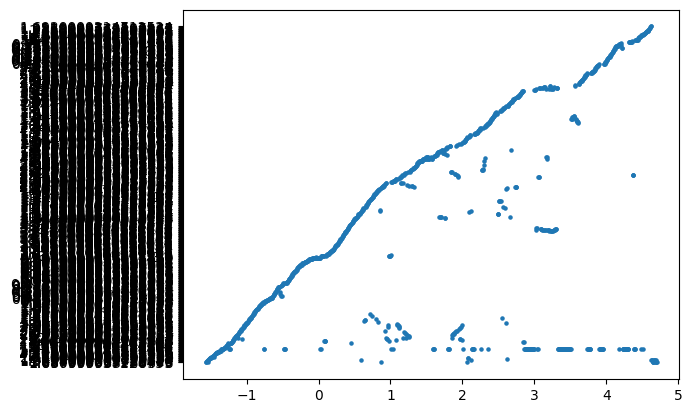

In [213]:
plt.scatter(alpha_df[500], rho_df[500], s=5)

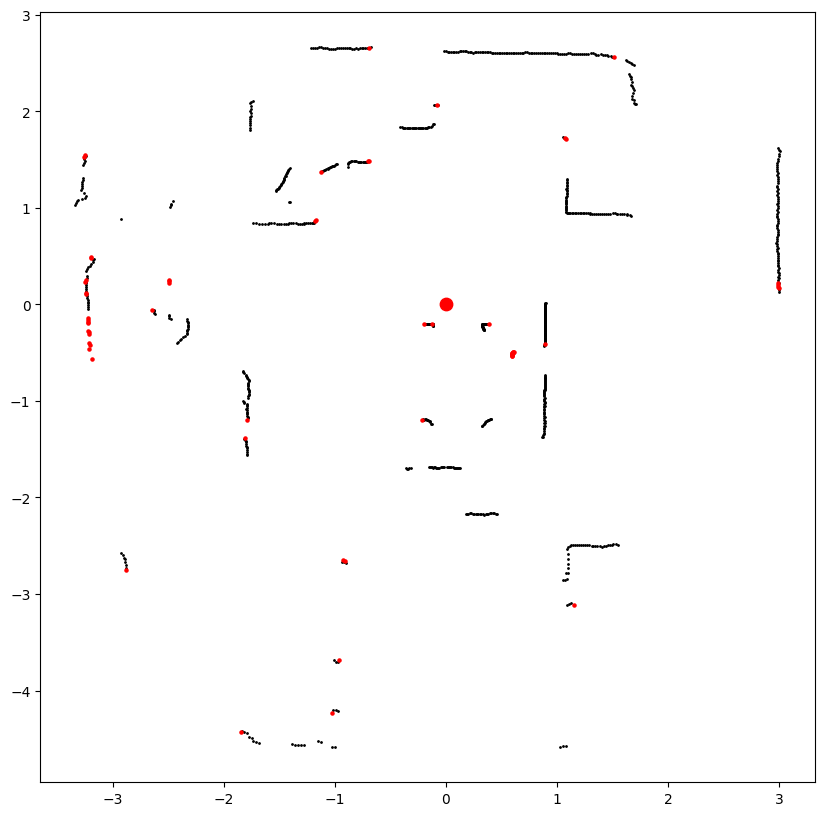

In [216]:
def pol2cart(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return(x, y)
color = []
for i in range(501):
        
    color.append(i/501)
color = np.array(color)

colors = plt.cm.rainbow(np.linspace(0, 1, 501))
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 10))
start =  pd.DataFrame(pol2cart(rho_df[0].astype(float), alpha_df[0].astype(float)), ['X', 'Y']).T
plt.scatter(start['X'], start['Y'], s=1,color = 'black')
for i in range(499,500):
    difference = rho_df[i-5].astype(float)-rho_df[i].astype(float)
    indx = np.array(list(difference[difference.astype(float) <= 0.05].index))       
    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    cartesian_df = cartesian_df.drop(indx, axis=1).T

    row_now = rho_df[i] 
    alpha_now = alpha_df[i]
    row_now.drop(indx)
    alpha_now.drop(indx)
    find_cont_leg(row_now.astype(float))

    feet_df = row_now
    indx2 = find_cont_leg(feet_df.astype(float))
    
    # print(feet_df)
    

    feet_df = feet_df[indx2]
    alpha_now = alpha_now[indx2]
    x = cartesian_df.astype(float)['X']
    y = cartesian_df.astype(float)['Y']
    # x,y = pol2cart(cartesian_df.astype(float), cartesian_df.astype(float))
    
    plt.scatter(x, y, s=5,color =colors[i])
    plt.scatter([0], [0], s=80,color ='red')
plt.show()
